In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# Import and read data csv files
file_2015 = "Data/NCDB_2015.csv"
file_2016 = "Data/NCDB_2016.csv"
file_2017 = "Data/NCDB_2017.csv"

df_2015 = pd.read_csv(file_2015)
df_2016 = pd.read_csv(file_2016)
df_2017 = pd.read_csv(file_2017)

C:\Users\ivyfo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\ivyfo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Merge 2015 and 2016 data files
df_ncdb_2015_2016 = pd.concat([df_2015,df_2016])

In [4]:
# Merge 2015-2017 data files
df_ncdb = pd.concat([df_ncdb_2015_2016, df_2017])

In [5]:
# Print first 5 rows of dataset
df_ncdb.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,2015,1,1,16,2,1,04,01,2,4,...,01,2009,UU,U,UU,UU,U,UU,U,2218030
1,2015,1,1,16,2,1,04,01,2,4,...,01,2009,01,F,64,QQ,2,02,U,2218030
2,2015,1,1,07,2,2,31,02,4,3,...,01,2014,UU,U,UU,UU,U,UU,U,2218034
3,2015,1,1,07,2,2,31,02,4,3,...,01,2014,01,M,27,QQ,2,02,U,2218034
4,2015,1,1,07,2,2,31,02,4,3,...,01,2014,02,M,37,13,2,02,2,2218034


In [6]:
# Print dataset data types
df_ncdb.dtypes

C_YEAR     int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE     int64
dtype: object

In [7]:
# Remove observations of C_MONTH with UU 
df_without_uu = df_ncdb[df_ncdb['C_MNTH']!='UU']

In [8]:
# Print dataset
df_without_uu

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,2015,1,1,16,2,1,04,01,2,4,...,01,2009,UU,U,UU,UU,U,UU,U,2218030
1,2015,1,1,16,2,1,04,01,2,4,...,01,2009,01,F,64,QQ,2,02,U,2218030
2,2015,1,1,07,2,2,31,02,4,3,...,01,2014,UU,U,UU,UU,U,UU,U,2218034
3,2015,1,1,07,2,2,31,02,4,3,...,01,2014,01,M,27,QQ,2,02,U,2218034
4,2015,1,1,07,2,2,31,02,4,3,...,01,2014,02,M,37,13,2,02,2,2218034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289814,2017,12,7,19,2,01,QQ,02,2,2,...,NN,NNNN,01,U,UU,99,2,NN,3,2569967
289815,2017,12,7,22,2,01,04,01,4,5,...,05,2010,01,M,39,11,U,02,1,2570203
289816,2017,12,7,22,2,01,04,01,4,5,...,05,2010,02,M,61,13,U,02,2,2570203
289817,2017,12,7,22,2,01,04,01,4,5,...,05,2010,03,M,40,21,U,02,2,2570203


In [9]:
# Change C_MONTH to integer data type
df_without_uu['C_MNTH'] = df_without_uu['C_MNTH'].astype(str).astype(int)

C:\Users\ivyfo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# Print dataset data types
df_without_uu.dtypes

C_YEAR     int64
C_MNTH     int32
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
C_CASE     int64
dtype: object

In [11]:
# Number of collisions by year and month - using the unique collision identifier C_CASE
df_without_uu.groupby(['C_YEAR', 'C_MNTH']).nunique()['C_CASE']

C_YEAR  C_MNTH
2015    1         10740
        2          9783
        3          7840
        4          7445
        5          9468
        6         10199
        7         10739
        8         10379
        9         10372
        10        10523
        11        10382
        12        10178
2016    1          9896
        2          8831
        3          7959
        4          8056
        5          9611
        6         10579
        7         10522
        8         10646
        9         10557
        10        10359
        11        10472
        12        10702
2017    1          9005
        2          8017
        3          8064
        4          7552
        5          9301
        6         10182
        7         10301
        8         10135
        9         10314
        10        10277
        11        10549
        12        10709
Name: C_CASE, dtype: int64

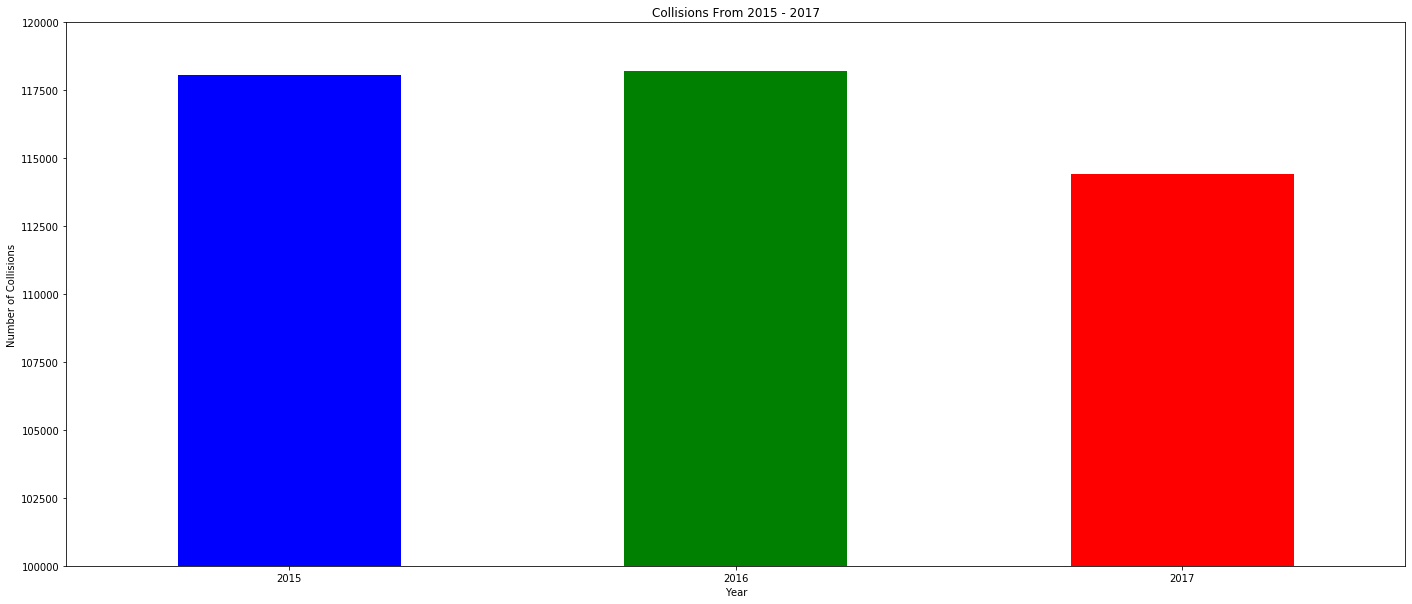

In [12]:
# Plot bar graph with number of collisions by year
plt.figure(figsize=(24,10))
df_without_uu.groupby(['C_YEAR']).nunique()['C_CASE'].plot(kind = 'bar', color=['b','g','r'])
plt.title("Collisions From 2015 - 2017")
plt.xlabel("Year")
plt.xticks(rotation='horizontal')
plt.ylabel("Number of Collisions")
plt.ylim(100000, 120000)
plt.savefig('Collisions By Year.png')

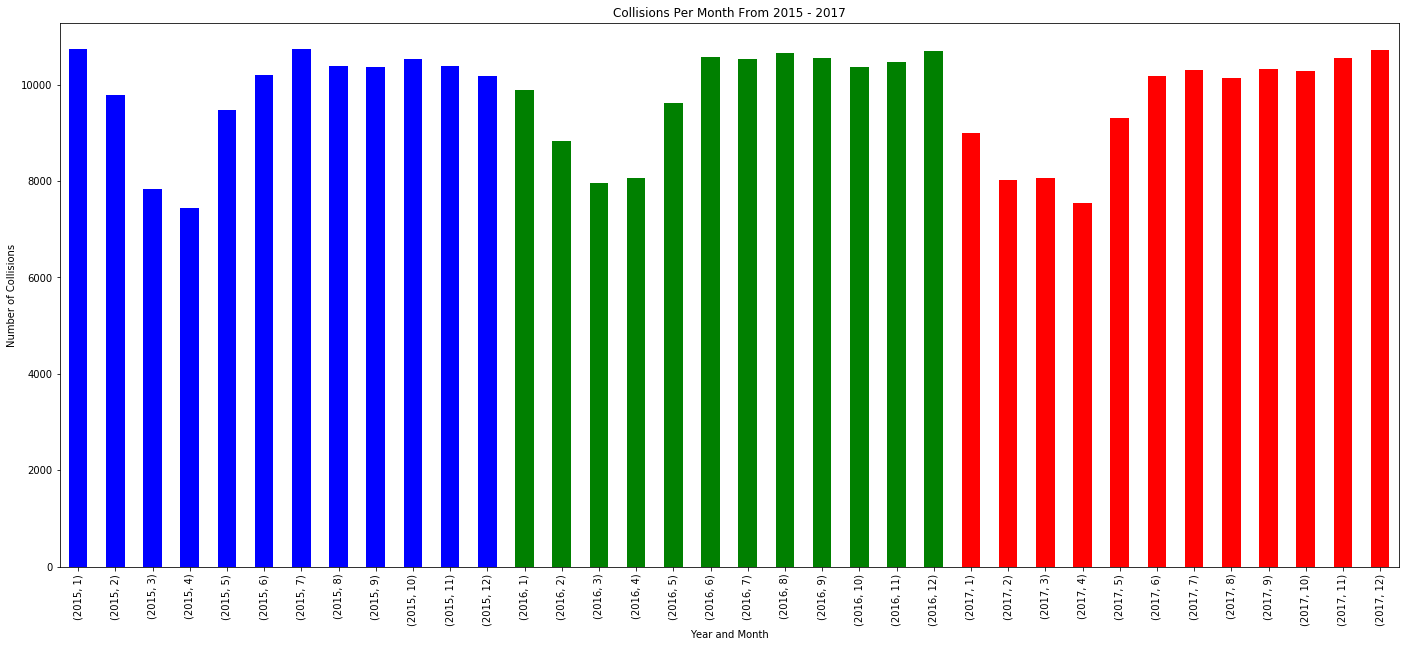

In [13]:
# Plot bar graph with number of collisions by year and month
x_axis= np.arange(len(df_without_uu))
tick_locations= [value for value in x_axis]
plt.figure(figsize=(24,10))
df_without_uu.groupby(['C_YEAR', 'C_MNTH']).nunique()['C_CASE'].plot(kind='bar', color=['b','b','b','b','b','b','b','b','b','b','b','b',
         'g','g','g','g','g','g','g','g','g','g','g','g',
         'r','r','r','r','r','r','r','r','r','r','r','r'])
plt.title("Collisions Per Month From 2015 - 2017")
plt.xlabel("Year and Month")
plt.ylabel("Number of Collisions")
plt.savefig('Collisions By Year and Month.png')

In [14]:
# Remove observations of C_WTHR with U & Q
df_weather = df_ncdb[(df_ncdb['C_WTHR']!='U') & (df_ncdb['C_WTHR']!='Q')]

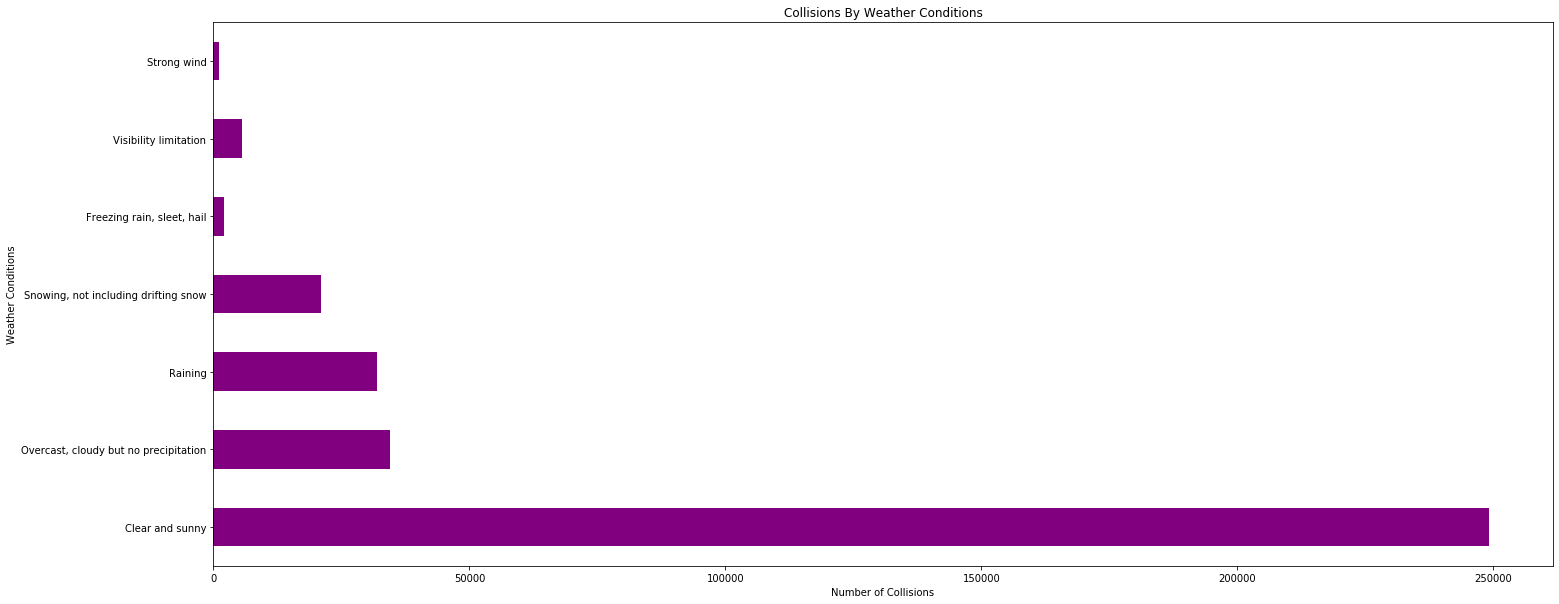

In [15]:
# Plot bar graph with number of collisions by weather conditions
plt.figure(figsize=(24,10))
df_weather.groupby(['C_WTHR']).nunique()['C_CASE'].plot(kind = 'barh', color = 'purple')
weather_conditions = ['Clear and sunny','Overcast, cloudy but no precipitation','Raining',
                      'Snowing, not including drifting snow','Freezing rain, sleet, hail',
                      'Visibility limitation','Strong wind']
y_axis= np.arange(len(weather_conditions))
tick_locations= [value for value in y_axis]
plt.yticks(tick_locations, weather_conditions)
plt.title("Collisions By Weather Conditions")
plt.ylabel("Weather Conditions")
plt.xlabel("Number of Collisions")
plt.savefig('Collisions By Weather Conditions.png')

In [16]:
# Remove observations of C_RSUR with U & Q
df_road_surface = df_ncdb[(df_ncdb['C_RSUR']!='U') & (df_ncdb['C_RSUR']!='Q')]
df_road_surface.describe()

,C_YEAR,C_SEV,C_CASE
count,878569.000000,878569.000000,8.785690e+05
mean,2015.978356,1.985064,2.391223e+06
std,0.809746,0.121295,1.015390e+05
min,2015.000000,1.000000,2.218007e+06
25%,2015.000000,2.000000,2.302140e+06
50%,2016.000000,2.000000,2.390706e+06
75%,2017.000000,2.000000,2.479285e+06
max,2017.000000,2.000000,2.570235e+06


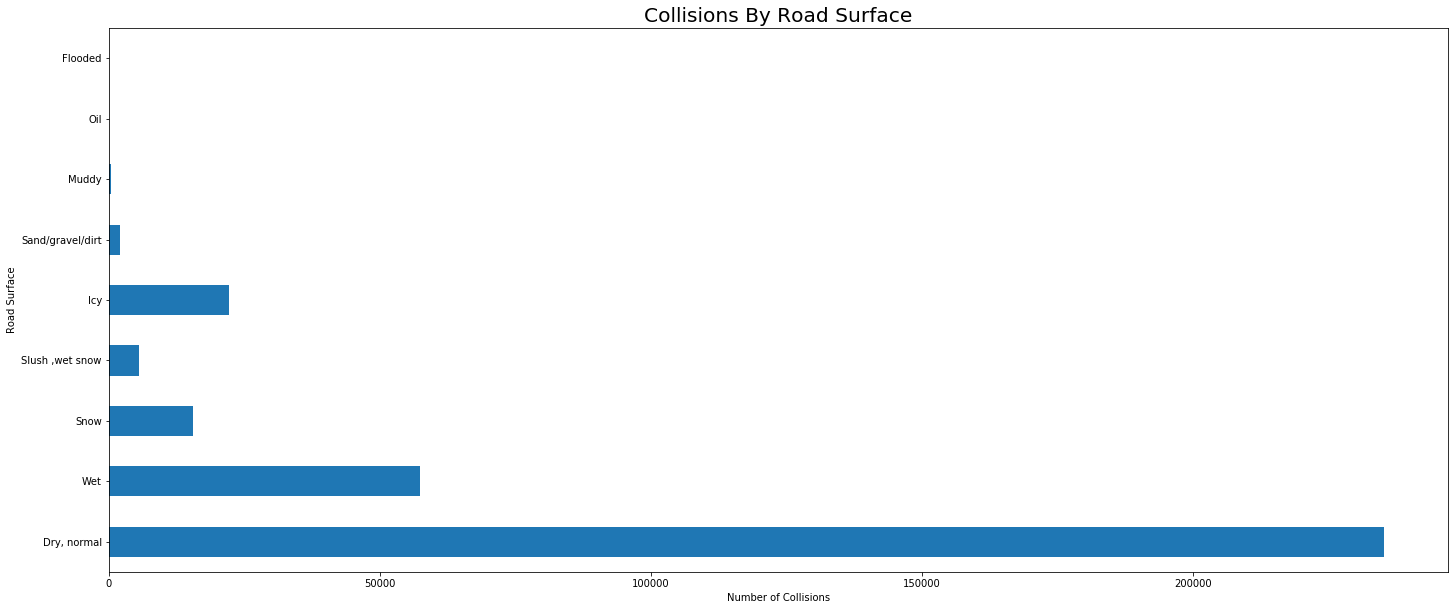

In [17]:
# Plot bar graph with number of collisions by road surface
plt.figure(figsize=(24,10))
df_road_surface.groupby(['C_RSUR']).nunique()['C_CASE'].plot(kind = 'barh')
rsur_labels = ['Dry, normal','Wet','Snow','Slush ,wet snow','Icy',
   'Sand/gravel/dirt', 'Muddy', 'Oil', 'Flooded']
y_axis= np.arange(len(rsur_labels))
tick_locations= [value for value in y_axis]
plt.yticks(tick_locations, rsur_labels)
# plt.set_facecolor("lightslategray")
plt.style.use('fivethirtyeight')
plt.title("Collisions By Road Surface")
plt.ylabel("Road Surface")
plt.xlabel("Number of Collisions")
plt.savefig('Collisions By Road Surface.png')

In [18]:
# Only keep observation where P_PSN==11 - where person position = driver
df_without_uu_driver = df_without_uu.loc[df_without_uu['P_PSN']=="11",:]
df_without_uu_driver.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
7,2015,1,1,16,2,2,04,01,4,3,...,01,2000,01,M,35,11,2,02,1,2218037
21,2015,1,1,12,2,1,02,01,1,3,...,01,2003,01,M,21,11,1,02,1,2218077
36,2015,1,1,06,2,2,02,02,1,1,...,01,2005,01,M,39,11,2,02,1,2220701
41,2015,1,1,18,2,1,03,01,6,4,...,01,2009,04,F,50,11,1,02,1,2220727
42,2015,1,1,08,2,1,04,01,1,5,...,01,2008,01,F,32,11,2,02,1,2220728


In [19]:
# Remove observations of P_AGE with UU & NN
df_driver_age = df_ncdb[(df_ncdb['P_AGE']!='UU') & (df_ncdb['P_AGE']!='NN')]
df_driver_age.describe()
# df_without_uu_user = df_without_uu.loc[df_without_uu['P_USER']=="1",:]
# df_without_uu_user['P_AGE'].value_counts()
# df_driver_without_uu=df_ncdb[(df_ncdb['P_AGE']!='UU')|(df_ncdb['P_AGE']!='NN')]
# df_driver_age.plot(kind = 'bar')

,C_YEAR,C_SEV,C_CASE
count,845376.000000,845376.000000,8.453760e+05
mean,2015.985260,1.984713,2.393038e+06
std,0.811897,0.122691,1.016766e+05
min,2015.000000,1.000000,2.218007e+06
25%,2015.000000,2.000000,2.304501e+06
50%,2016.000000,2.000000,2.392480e+06
75%,2017.000000,2.000000,2.481858e+06
max,2017.000000,2.000000,2.570235e+06


In [20]:
# Change P_AGE integer data type
df_driver_age['P_AGE'] = df_driver_age['P_AGE'].astype(str).astype(int)

# Create bins for age
age_bins = [0,16,26,36,46,56,76,99]
age_names = ["<16","16-26","26-36","36-46","46-56","56-76",">76"]
df_driver_age['P_AGE_bins'] = pd.cut(df_driver_age['P_AGE'],age_bins,labels=age_names)
df_driver_age

C:\Users\ivyfo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ivyfo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE,P_AGE_bins
1,2015,1,1,16,2,1,04,01,2,4,...,2009,01,F,64,QQ,2,02,U,2218030,56-76
3,2015,1,1,07,2,2,31,02,4,3,...,2014,01,M,27,QQ,2,02,U,2218034,26-36
4,2015,1,1,07,2,2,31,02,4,3,...,2014,02,M,37,13,2,02,2,2218034,36-46
6,2015,1,1,07,2,2,31,02,4,3,...,2010,01,M,43,QQ,1,02,U,2218034,36-46
7,2015,1,1,16,2,2,04,01,4,3,...,2000,01,M,35,11,2,02,1,2218037,26-36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289836,2017,UU,U,UU,2,UU,UU,01,U,U,...,UUUU,01,F,20,11,1,NN,1,2455828,16-26
289837,2017,UU,U,UU,2,UU,UU,01,U,U,...,UUUU,01,F,47,11,1,NN,1,2455828,46-56
289838,2017,UU,U,UU,2,UU,UU,01,U,U,...,UUUU,01,M,24,11,1,NN,1,2455828,16-26
289839,2017,UU,U,23,2,01,03,01,1,1,...,UUUU,01,M,45,96,2,09,U,2570233,36-46


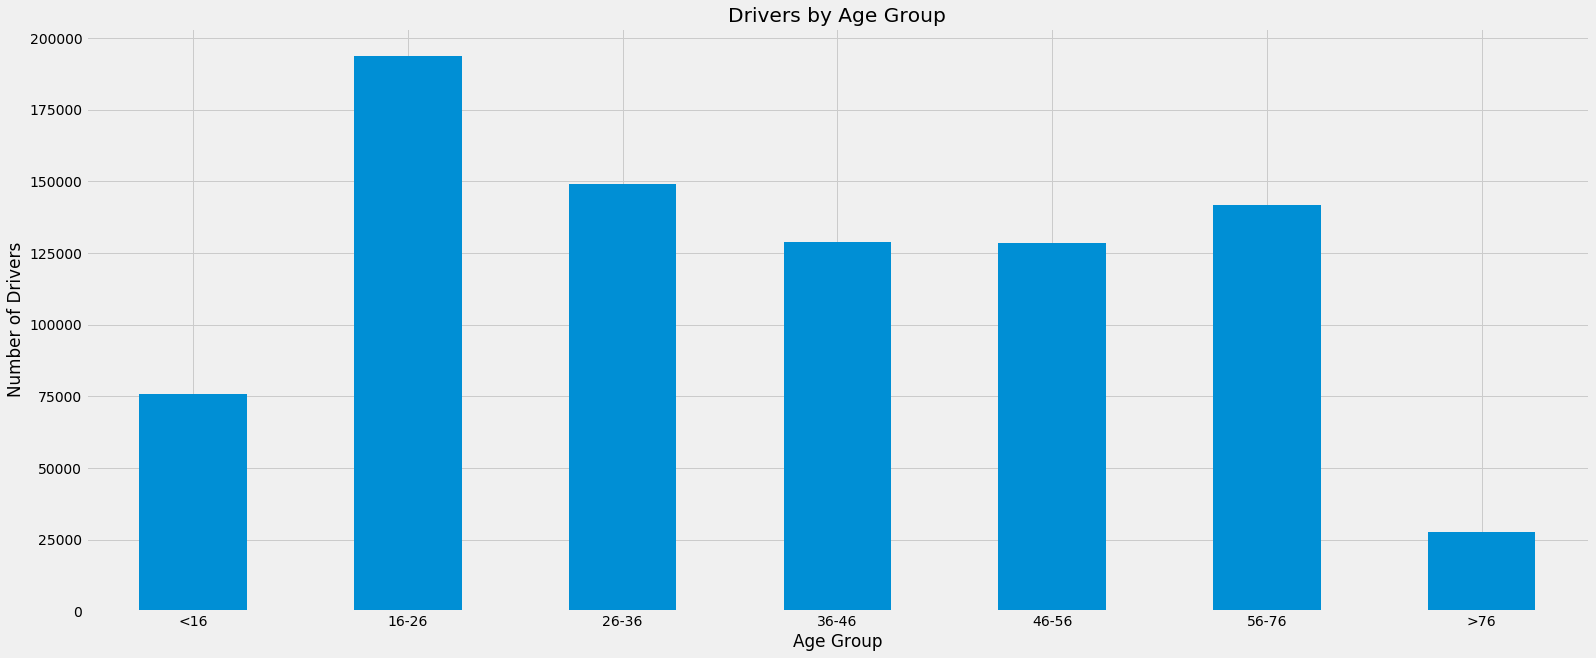

In [33]:
# Plot bar graph with drivers by age group
plt.figure(figsize=(24,10))
df_driver_age.groupby(['P_AGE_bins']).count()['C_CASE'].plot(kind = 'bar')
x_axis= np.arange(len(age_names))
tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, age_names, rotation='horizontal')
plt.title("Drivers by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Drivers")
plt.savefig('Drivers By Age Group.png')

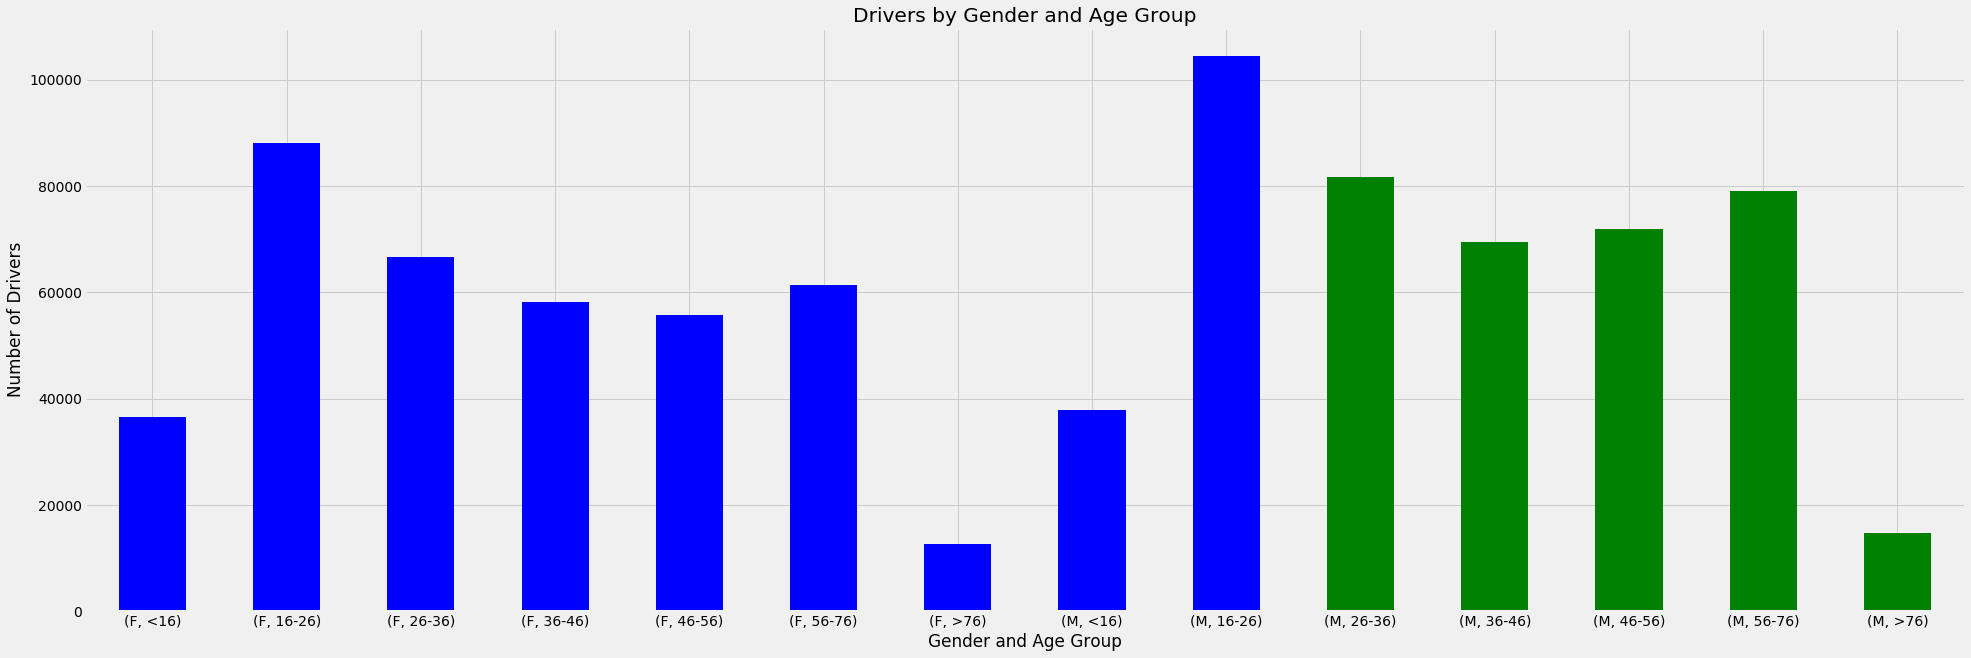

In [22]:
# Remove observations of P_SEX with U & N
df_driver_gender_wo_UN = df_driver_age[(df_driver_age['P_SEX']!='U') & (df_driver_age['P_SEX']!='N')]

# Plot bar graph with drivers by age group and gender
plt.figure(figsize=(30,10))
df_driver_gender_wo_UN.groupby(['P_SEX','P_AGE_bins']).count()['C_CASE'].plot(kind = 'bar', 
                color=['b','b','b','b','b','b','b','b','b','g','g','g','g','g','g','g','g','g'] )
plt.xticks(rotation='horizontal')
plt.title("Drivers by Gender and Age Group")
plt.xlabel("Gender and Age Group")
plt.ylabel("Number of Drivers")
plt.savefig('Drivers By Gender and Age Group.png')

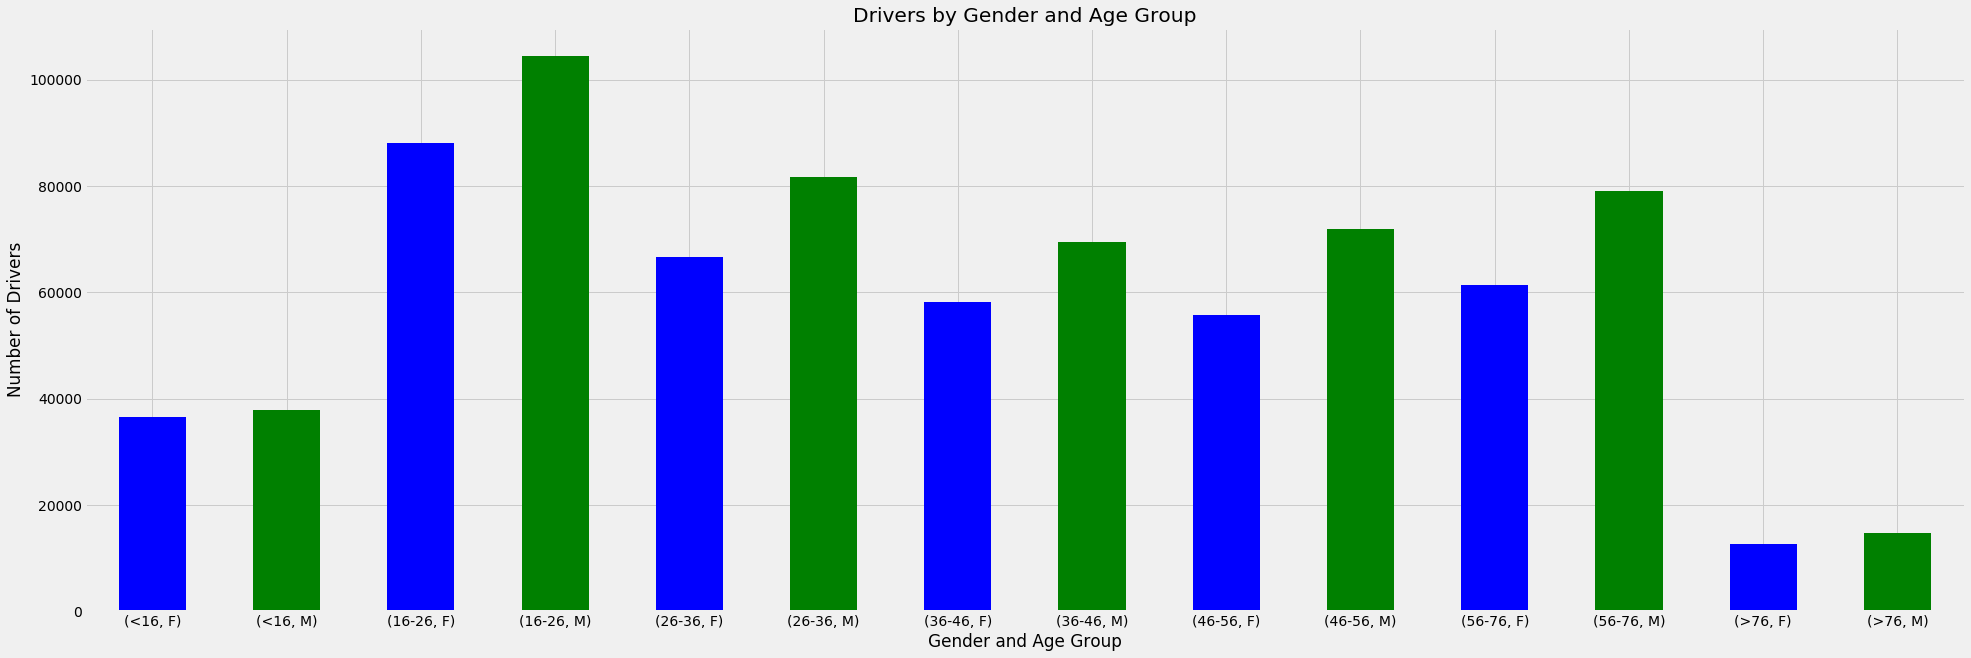

In [23]:
# Plot bar graph with drivers by age group and gender
plt.figure(figsize=(30,10))
df_driver_gender_wo_UN = df_driver_age[(df_driver_age['P_SEX']!='U') & (df_driver_age['P_SEX']!='N')]
df_driver_gender_wo_UN.groupby(['P_AGE_bins', 'P_SEX']).count()['C_CASE'].plot(kind = 'bar',
color=['b','g','b','g','b','g','b','g','b','g','b','g','b','g','b','g','b','g'])
plt.xticks(rotation='horizontal')
plt.title("Drivers by Gender and Age Group")
plt.xlabel("Gender and Age Group")
plt.ylabel("Number of Drivers")
plt.savefig('Drivers By Gender and Age Group 2.png')

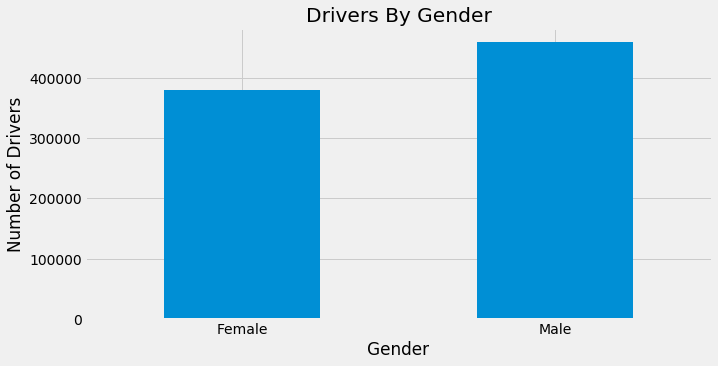

In [35]:
# Plot bar graph with drivers by gender
plt.figure(figsize=(10,5))
df_driver_gender_wo_UN.groupby(['P_SEX']).count()['C_CASE'].plot(kind = 'bar')
Cis_gender_labels = ['Female','Male']
x_axis= np.arange(len(Cis_gender_labels))
tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, Cis_gender_labels, rotation='horizontal')
plt.title("Drivers By Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Drivers")
plt.savefig('Drivers By Gender.png')

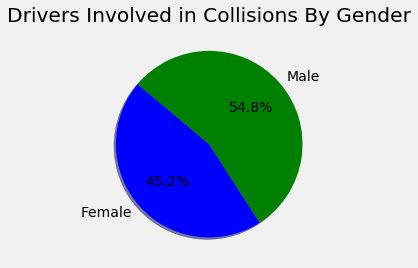

In [25]:
# Plot pie graph with drivers by gender
gender_list = df_driver_gender_wo_UN.groupby(['P_SEX']).count()['C_CASE'].tolist()
gender_labels = ['Female','Male']
colors = ["Blue", "Green"]
plt.pie(gender_list,labels=gender_labels, colors= colors ,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Drivers Involved in Collisions By Gender")
plt.savefig('Collisions By Gender.png')
# del gender_list[2]
# del gender_list[2]
#gender_list_without_na = gender_list.iloc[[0,1,3],:]
#gender_list_without_na

In [26]:
# Remove observations of C_HOUR with UU 
df_hours_without_uu = df_ncdb[(df_ncdb['C_HOUR']!='UU')]

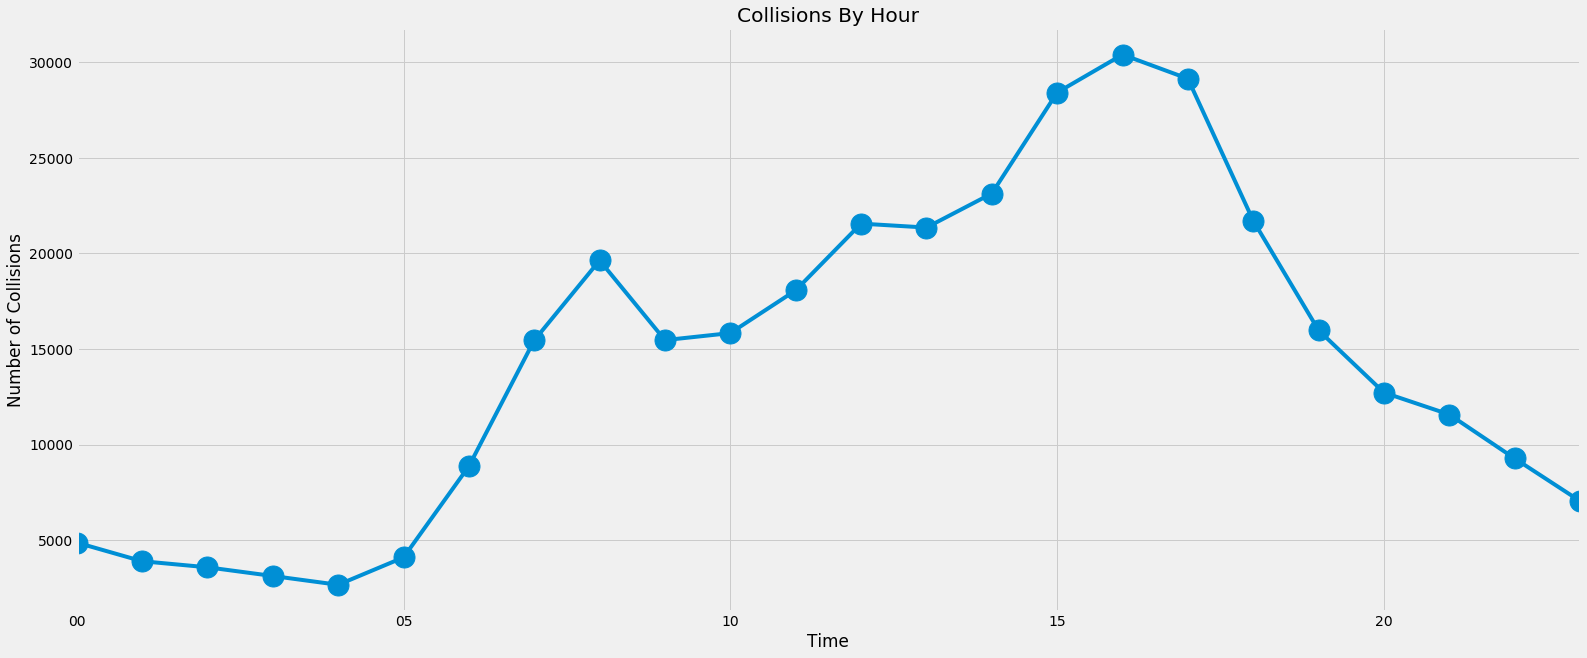

In [27]:
# Plot bar graph with collisions by hour
plt.figure(figsize=(24,10))
df_hours_without_uu.groupby(['C_HOUR']).nunique()['C_CASE'].plot(kind='line', marker='o', ms=21)
plt.title("Collisions By Hour")
plt.xlabel("Time")
plt.ylabel("Number of Collisions")
plt.savefig('Collisions By Hour.png')

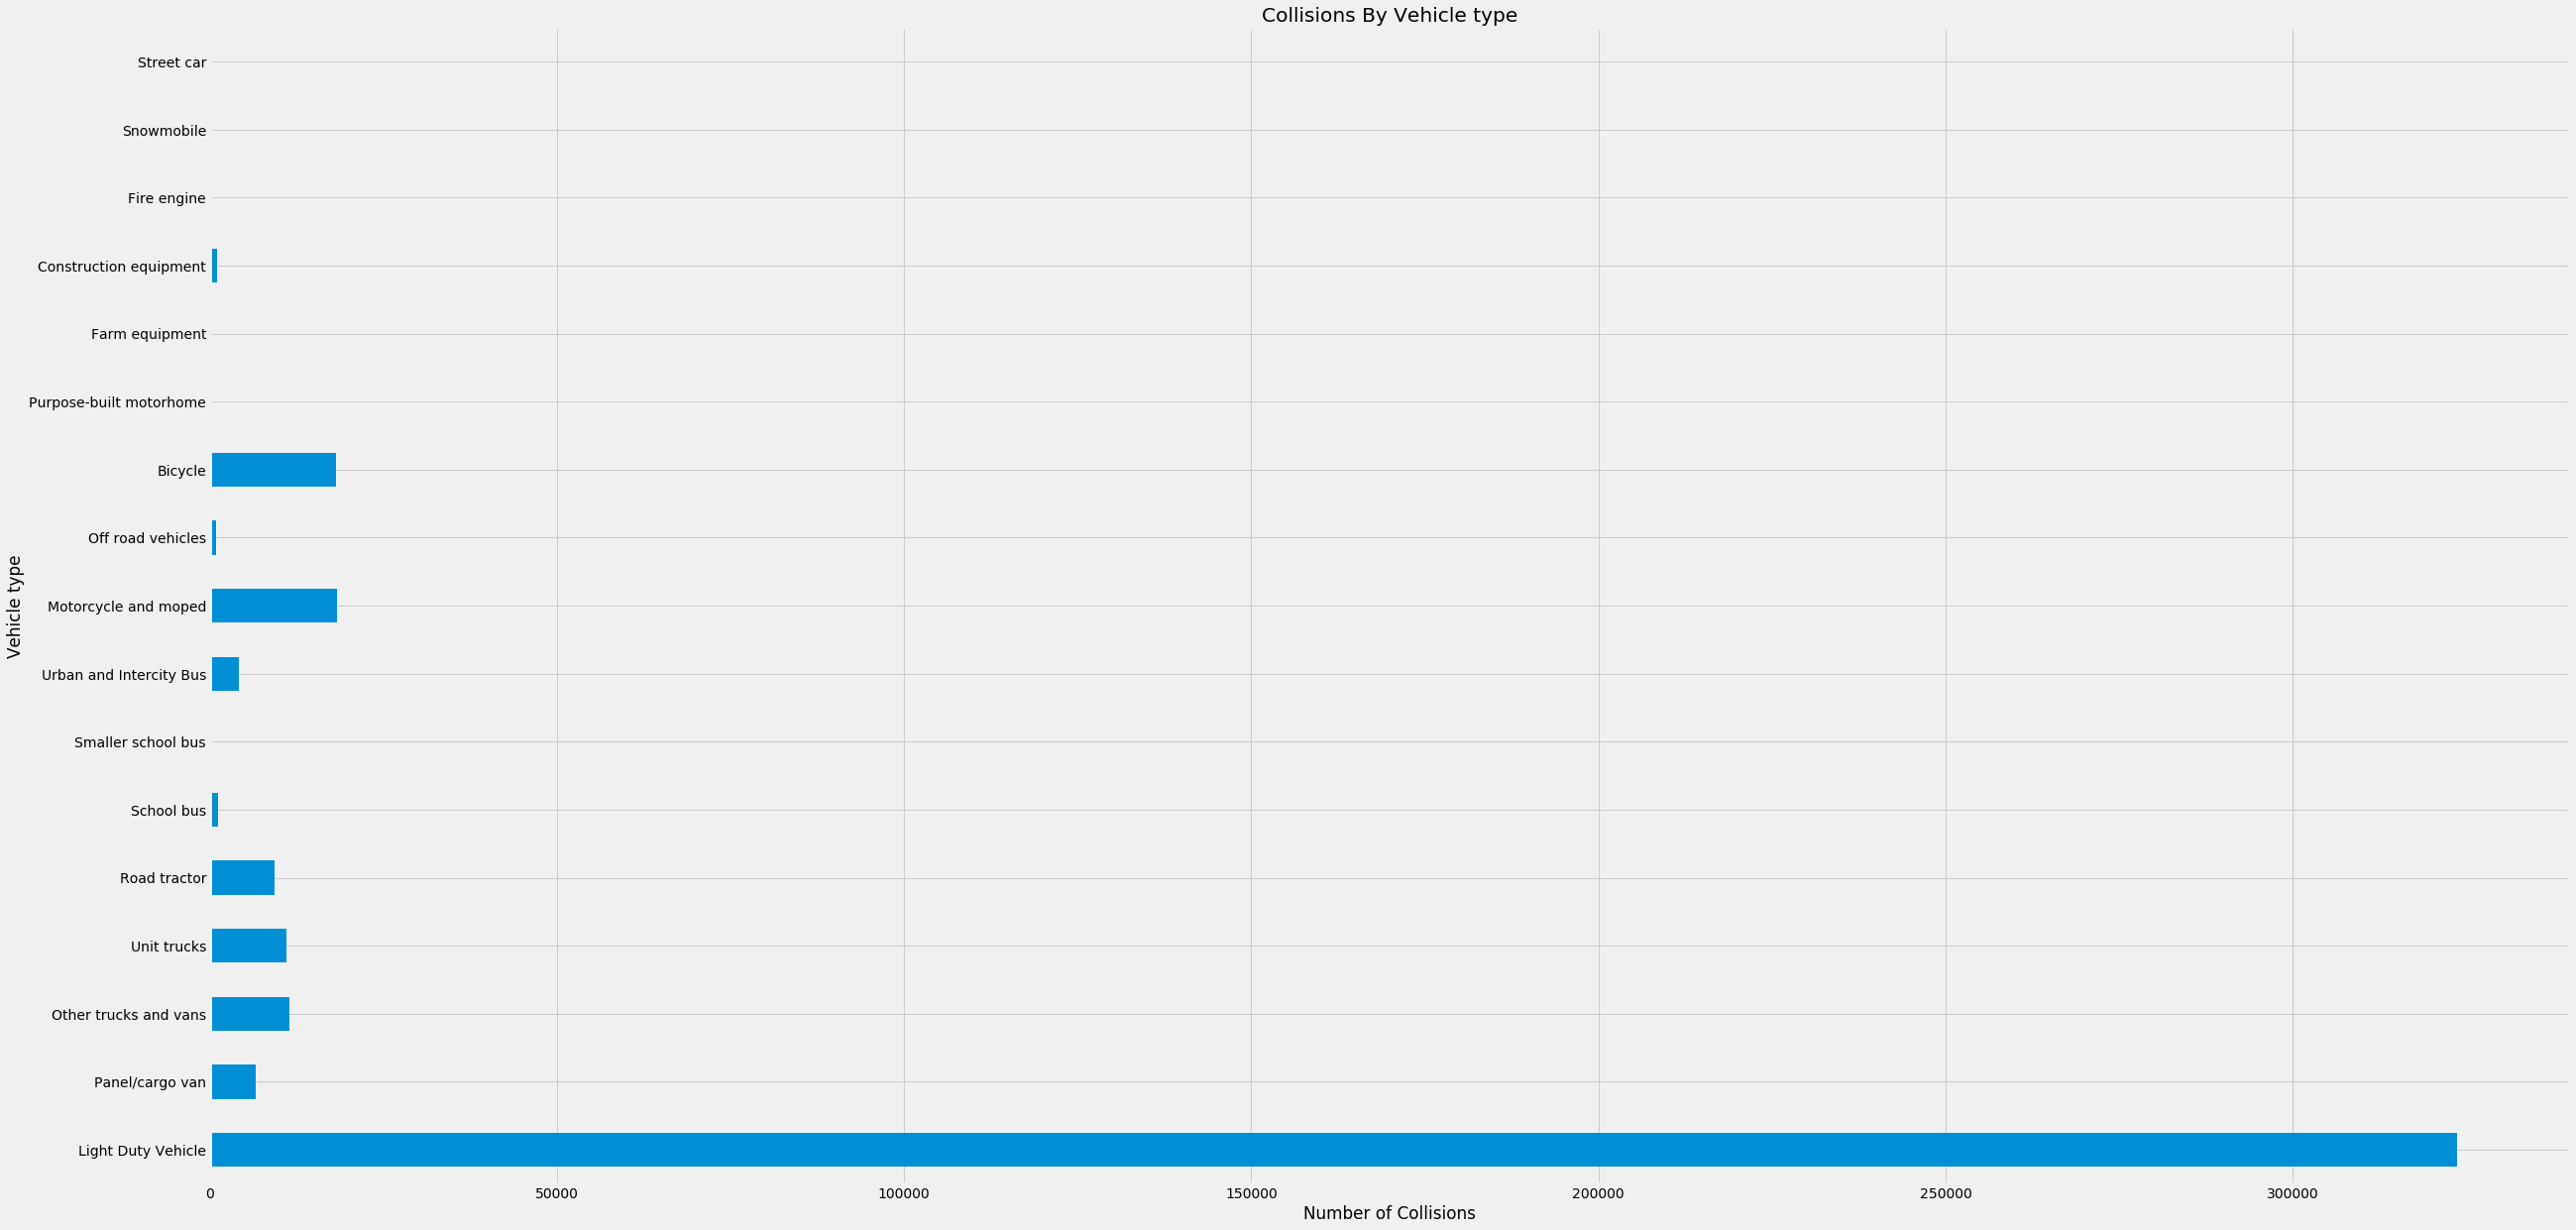

In [28]:
# Remove observations of C_HOUR with UU 
df_vehicle_type = df_ncdb[(df_ncdb['V_TYPE']!='UU') & (df_ncdb['V_TYPE']!='NN') & (df_ncdb['V_TYPE']!='QQ')]

# Plot bar graph with collisions by vehicle type
plt.figure(figsize=(38,20))
df_vehicle_type.groupby(['V_TYPE']).nunique()['C_CASE'].plot(kind='barh')
v_type_labels=['Light Duty Vehicle','Panel/cargo van','Other trucks and vans','Unit trucks','Road tractor','School bus',
            'Smaller school bus','Urban and Intercity Bus','Motorcycle and moped','Off road vehicles','Bicycle',
            'Purpose-built motorhome','Farm equipment','Construction equipment','Fire engine','Snowmobile','Street car']
y_axis= np.arange(len(v_type_labels))
tick_locations= [value for value in y_axis]
plt.yticks(tick_locations, v_type_labels)
plt.title("Collisions By Vehicle type")
plt.ylabel("Vehicle type")
plt.xlabel("Number of Collisions")
plt.savefig('Collisions By Vehicle Type.png')

In [29]:
# df_vehicle_type = df_ncdb[(df_ncdb['V_TYPE']!='UU') & (df_ncdb['V_TYPE']!='NN')]

In [30]:
# v_type_list = df_without_uu.groupby(['V_TYPE']).nunique()['C_CASE'].tolist()
# del v_type_list[-3]
# v_type_list

In [31]:
# df_without_uu.groupby(['V_TYPE']).nunique()['C_CASE']

In [32]:
# df_without_uu_driver.groupby(['P_AGE']).count()['C_CASE']

#plt.figure(figsize=(24,10))

# Cis_gender_labels = ['Female','Male','N/A','Unknown']
# x_axis= np.arange(len(Cis_gender_labels))
# tick_locations= [value for value in x_axis]

#plt.xticks(tick_locations, Cis_gender_labels)
# plt.title("Drivers by Age ")
# plt.xlabel("Gender")
# plt.ylabel("Number of Drivers")
# plt.savefig('Drivers By Gender.png')